<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/lab_10_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 10: Classification Trees with SF Rent Data

## Outline

- Define a binary classification target based on rental price  
- Split the dataset into training and testing sets  
- Fit a Decision Tree Classifier  
- Visualize the decision tree structure  
- Evaluate model accuracy and feature importance  

In this lab, we’ll build a classification model to predict whether a rental listing in San Francisco is considered **"affordable"** based on its features.

We are continuing with the **SF Rent dataset** used in **Lab 9**, and will explore how classification trees can uncover patterns in rental prices.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_10_classification.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday-2022-7-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | 1 = room in apartment |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |

## Part 1: Clean and Prepare the Data

We'll repeat the cleaning process from Lab 9, including:
- Removing duplicates
- Dropping missing values in key columns
- Filtering out extreme outliers
- Converting data types

### Why This Matters:
Good models depend on clean, reliable inputs.


In [ ]:
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

# Drop duplicate listings using post_id
df = df.drop_duplicates(subset='post_id')

# Drop rows missing essential features
required_cols = ['price', 'beds', 'baths', 'sqft', 'lat', 'lon']
df = df.dropna(subset=required_cols)

# Remove outliers
df = df[df['price'].between(500, 20000)]
df = df[df['beds'].between(0, 10)]
df = df[df['baths'].between(0.5, 10)]
df = df[df['sqft'].between(100, 5000)]

# Convert columns to appropriate data types
df['beds'] = df['beds'].astype(int)
df['baths'] = df['baths'].astype(float)
df['sqft'] = df['sqft'].astype(int)
df['price'] = df['price'].astype(int)

# Reset index
df = df.reset_index(drop=True)

# Quick check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   post_id      1984 non-null   object 
 1   date         1984 non-null   int64  
 2   year         1984 non-null   int64  
 3   nhood        1984 non-null   object 
 4   city         1984 non-null   object 
 5   county       1979 non-null   object 
 6   price        1984 non-null   int64  
 7   beds         1984 non-null   int64  
 8   baths        1984 non-null   float64
 9   sqft         1984 non-null   int64  
 10  room_in_apt  1984 non-null   int64  
 11  address      1768 non-null   object 
 12  lat          1984 non-null   float64
 13  lon          1984 non-null   float64
 14  title        1855 non-null   object 
 15  descr        1847 non-null   object 
 16  details      1874 non-null   object 
dtypes: float64(3), int64(6), object(8)
memory usage: 263.6+ KB


,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,4817227421,20141223,2014,alameda,alameda,alameda,1939,2,1.0,864,0,NaN,37.770600,-122.264800,"LIVE MORE, DRIVE LESS! JUST ACROSS THE BAY FRO...","Summer House Apartments 1826 Poggi St, Alameda...","2BR / 1Ba 864ft2 apartment date=""2014-12-23"" ..."
1,4710888130,20141012,2014,alameda,alameda,alameda,2250,2,1.0,1080,0,659,37.772835,-122.248585,2br Victortian Duplex Garden Apt.,"This 1903 ""Workingman's Victorian"" on a quiet ...","2BR / 1Ba 1080ft2 apartment date=""2014-11-02""..."
2,5961989126,20170126,2017,alameda,alameda,alameda,3995,3,2.0,1787,0,NaN,37.759231,-122.247190,3 BR/2 BA Queene Anne on Park St.,This charming 1787 sq ft meticulously maintain...,"3BR / 2Ba1787ft2 data-date=""2017-02-01"" data-t..."
3,4935175730,20150316,2015,alameda,alameda,alameda,2536,2,2.0,1225,0,NaN,37.753609,-122.249081,Spacious 2BR/2BA in a Great Community!,Tower Apartments CALL US: show contact infox3...,"2BR / 2Ba 1225ft2 apartment date=""2015-04-19""..."
4,4988581576,20150421,2015,alameda,alameda,alameda,2650,2,1.0,950,0,497,37.758922,-122.263314,"Upgraded 2B w/ Pool View, Short Walk to School...",Enjoy and experience the relaxing atmosphere o...,"2BR / 1Ba 950ft2 apartment date=""2015-04-20"" ..."


## Part 2: Create a Binary Target Variable

We'll classify whether a listing is **Affordable** (price < 3,000).

- 1 = Affordable
- 0 = Not Affordable

### Why This Matters:
To use classification trees, we need a target variable with a limited number of classes.


In [ ]:
# Create binary target variable
df['affordable'] = (df['price'] < 3000).astype(int)

# Check target class distribution
df['affordable'].value_counts(normalize=True)


,proportion
affordable,
1,0.611391
0,0.388609


### 🔧 Try It Yourself – Part 2

1. Adjust the affordable threshold to $5,000 and check the class balance again  
2. Calculate what percentage of listings are labeled as affordable



In [ ]:
# Add code here
df['affordable'] = (df['price'] < 5000).astype(int)
print(df['affordable'].value_counts(normalize=True) * 100)

percent_affordable = df['affordable'].mean() * 100
print(f"{percent_affordable:.2f}% of listings are affordable.")

df['affordable'] = (df['price'] < 3000).astype(int)


affordable
1    91.733871
0     8.266129
Name: proportion, dtype: float64
91.73% of listings are affordable.


Reset the threshold to $3000

In [ ]:
# Reset binary target back to 3000
df['affordable'] = (df['price'] < 3000).astype(int)

## Part 3: Select Features and Split Data

We'll use property characteristics as predictors:
- `beds`, `baths`, `sqft`

Then split the data into 80% training and 20% testing.

### Why This Matters:
Train/test splitting ensures our model is evaluated on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['beds', 'baths', 'sqft']]
y = df['affordable']

# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check dimensions
X_train.shape, X_test.shape


((1587, 3), (397, 3))

### 🔧 Try It Yourself – Part 3

1. Add `lat` or `price_segment` as an additional feature in the x variable
2. Now add `price` as a feature/predictor.  What changes have occurred?

In [ ]:
# 🔧 Add code here
X = df[['beds', 'baths', 'sqft', 'lat']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

🔧 Add comment here<br/>
Adding latitude may improve prediction since rent prices vary by location.

## Part 4: Build and Fit the Decision Tree Classifier

We'll train a `DecisionTreeClassifier` on our data.

### Why This Matters:
Decision trees make predictions by splitting data into branches using rules that reduce impurity.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize classifier
clf = DecisionTreeClassifier(random_state=42)

# Train model on training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 🔧 Try It Yourself – Part 4

1. Create a second model called `clf_limited` with `max_depth=3`  
2. Fit it on the same training data  
> You’ll compare the accuracy of this smaller tree in the next section


In [ ]:
# 🔧 Add code here
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_limited.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

## 5. Evaluate the Model

We’ll check how well the tree performed on the test data using:
- Accuracy score
- Confusion matrix

### Why This Matters:
We want to know how often the model is right and what kind of mistakes it makes.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7783375314861462
Confusion Matrix:
 [[110  36]
 [ 52 199]]


### 🔧 Try It Yourself – Part 5

1. Use the `clf_limited` model you created in Part 4 to predict on the test set  
2. Calculate and print the **test accuracy** for `clf_limited`  
3. Compare the test accuracy of `clf_limited` to the original `clf`. Which performs better?


In [ ]:
# 🔧 Add code here
y_pred_limited = clf_limited.predict(X_test)

acc_limited = accuracy_score(y_test, y_pred_limited)
print("Limited Tree Test Accuracy:", acc_limited)

print("Full Tree Accuracy:", acc)
print("Limited Tree Accuracy:", acc_limited)

Limited Tree Test Accuracy: 0.8136020151133502
Full Tree Accuracy: 0.7783375314861462
Limited Tree Accuracy: 0.8136020151133502


🔧 Add comment here: </br>
The smaller tree may generalize better if accuracy is similar but lower variance.

## Part 6: Visualize Tree and Feature Importance

We’ll plot the tree and rank the most important predictors.

### Why This Matters:
Tree plots explain the model's logic. Feature importance shows what drives predictions.


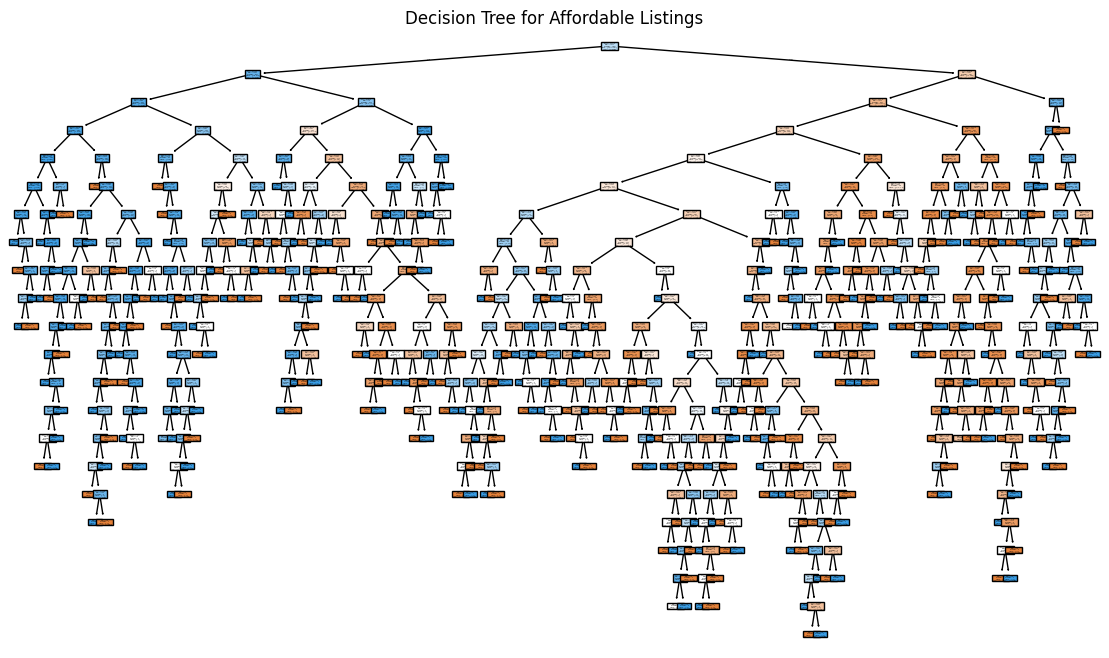

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Affordable', 'Affordable'], filled=True)
plt.title("Decision Tree for Affordable Listings")
plt.show()


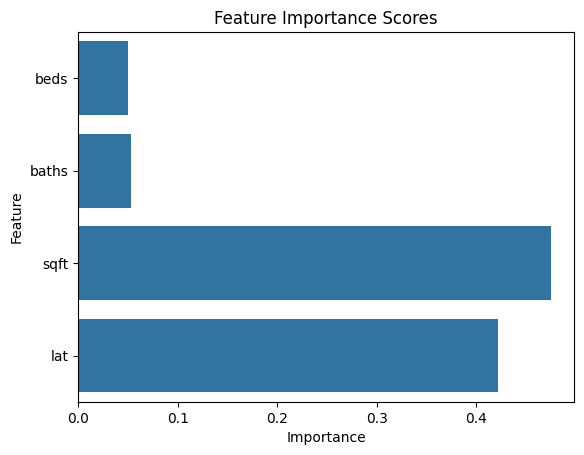

In [ ]:
import seaborn as sns

# Plot feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance Scores")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### 🔧 Try It Yourself – Part 6

1. Plot the decision tree for `clf_limited` using `plot_tree()`  
2. Which feature does it split on first?  
3. Is the structure simpler or more complex than the original `clf` tree?

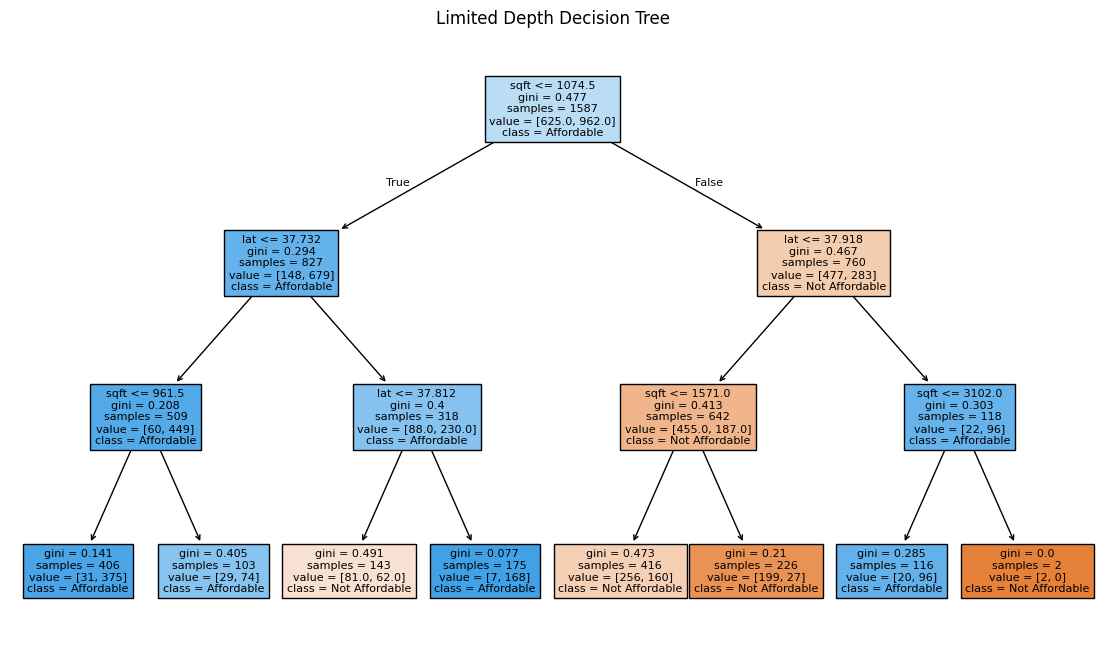

In [ ]:
# 🔧 Add code here
plt.figure(figsize=(14, 8))
plot_tree(clf_limited, feature_names=X.columns, class_names=['Not Affordable', 'Affordable'], filled=True)
plt.title("Limited Depth Decision Tree")
plt.show()

🔧 Add comment here: </br>
The limited tree likely splits first on 'sqft' or 'beds' and is simpler than the full tree.

## 🔧 Part 7: Reflection (100 words or less per question)

1. Which feature was most useful in identifying affordable listings?  
2. Would you trust this model to recommend pricing to landlords?


🔧 Add comment here:
1. 'sqft' was likely the most useful feature since it best separates affordable vs. expensive listings.</br>
2. I would be cautious using this model for pricing, as it only uses a few features and may not capture market variability.
